## Chapter 04 - 분류

- 지도학습은 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 방식
- 분류(Classification) = 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것
    - 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
    - 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
    - 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
    - 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서프트 벡터 머신(Support Vector Machine)
    - 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
    - 심층 연결 기반의 신경망(Neural Network)
    - 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)
- 앙상블 => 배깅(Bagging)과 부스팅(Boosting) 방식
    - 배깅 방식
        - 랜덤 포레스트(Random Forest)
    - 부스팅 방식
        - Gradient Boosting
        - XgBoost
        - LightGBM
        - Stacking

#### 결정트리

- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것
    - 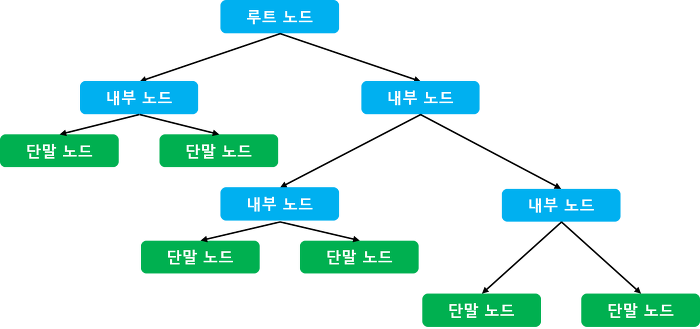
    - 규칙노드(내부노드, Decision Node) = 규칙 조건이 되는 것
    - 리프노드(단말노드, Leaf Node) = 결정된 클래스 값
    - 새로운 규칙 조건마다 서브 트리(Sub Tree)가 생성
    - 많은 규칙이 있다는 것은 곧 분류의 결정하는 방식이 더욱 복잡해진다는 얘기이고, 이는 곧 과적합으로 이어지기 쉽다.
        - 트리의 깊이(Depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다
- 결정 트리 장점
    - 쉽다. 직관적이다
    - 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음
- 결정 트리 단점
    - 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요

- 정보의 균일도를 측정하는 방법
    - 정보이득(Information Gain) 지수
        - 정보 이득은 엔트로피라는 개념을 기반으로 합니다. 엔트로피는 주어진 데이터의 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮습니다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값입니다. 즉, 1-엔트로피 지수입니다. 결정 트리는 이 정보 이득 지수로 분할 기준을 정합니다. 즉, 정보 이득이 높은 속성을 기준으로 분할합니다.
    - 지니 계수
        - 지니 계수는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수입니다. 경제학자인 코라도 지니(Corrado Gini)의 이름에서 딴 계수로서 0이 가장 평등하고 1로 갈수록 불평등합니다. 머신러닝에 적용될 때는 의미론적으로 재해석돼 데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 경우에는 불평등한 값이 됩니다. 즉, 다양성이 낮을 수록 균일도가 높다는 의미로서, 1로 갈수록 균일도가 높으므로 지니 게수가 높은 속성을 기준으로 분할하는 것입니다.

- 결정 트리 파라미터
    - min_samples_split
        - 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용함
        - 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
        - 과적합을 제어, 1로 설정할 경우 분할되는 노드가 많아져서 과적합 가능성 증가
    - min_samples_leaf
        - 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
        - Min_samples_split와 유사하게 과적합 제어 용도. 그러나 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요
    - max_features
        - 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행
        - int 형으로 지정하면 대상 피처의 개수, float 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임
        - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수)
        - 'auto'로 지정하면 sqrt와 동일
        - 'log'는 전체 피처 중 log2(전체 피처 개수) 선정
        - 'None'은 전체 피처 선정
    - max_detph
        - 트리의 최대 깊이를 규정
        - 디폴트는 None. None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴
        - 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요
    - max_leaf_nodes
        - 말단 노드(Leaf)의 최대 계수

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일로 생성함
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, feature_names = iris_data.feature_names,
               impurity=True, filled=True)

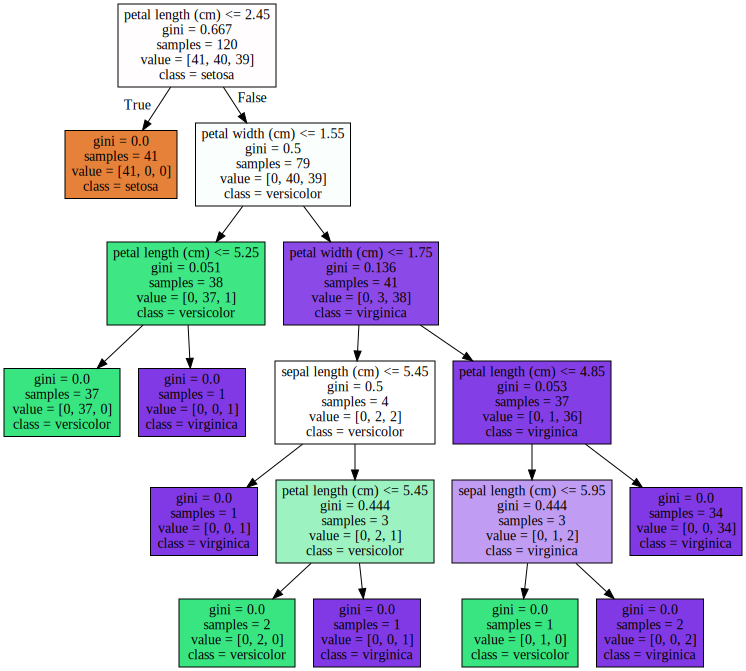

In [3]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


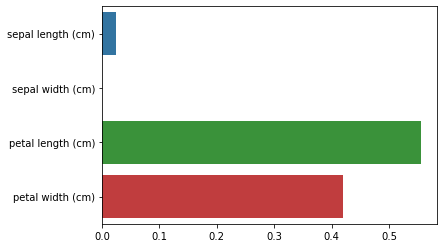

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

# feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

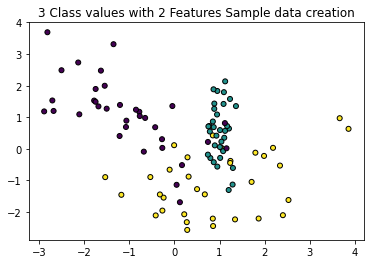

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolors='k')

In [6]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

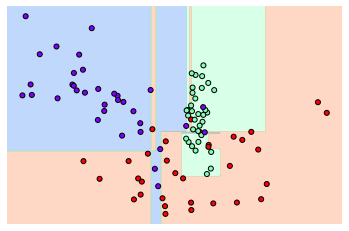

In [7]:
from sklearn.tree import DecisionTreeClassifier

# 특징한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

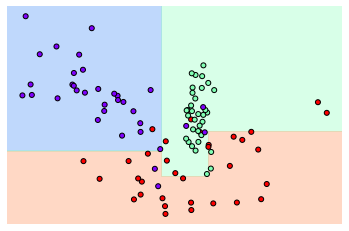

In [8]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features,y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('./data/features.txt', sep='\s+',
                             header = None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [10]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [11]:
def get_human_dataset():
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./data/features.txt',sep='\s+', header=None, names=['column_index','column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처링을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./data/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./data/test/X_test.txt',sep="\s+",names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./data/train/y_train.txt',sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./data/test/y_test.txt',sep='\s+',header=None, names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [12]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [13]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.3min finished


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [16]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 수출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [17]:
max_depths = [6,8,10,12,16,20,24]
# max_depths 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [18]:
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파리미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.6min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파리미터: {'max_depth': 8, 'min_samples_split': 16}


In [19]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


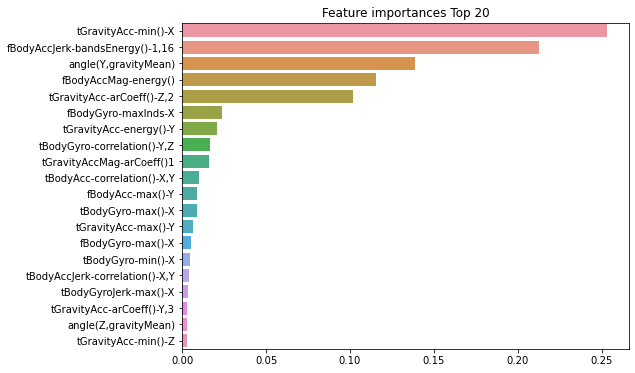

In [20]:
import seaborn as sns
%matplotlib inline

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title("Feature importances Top 20")
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

#### 앙상블 학습

- 앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
    - 이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있지만, 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타내고 있습니다.
    - 앙상블 알고리즘 => 랜덤 포레스트와 그래디언트 부스팅 알고리즘
    - 앙상블 학습의 유형 = Voting, Bagging, Boosting, Stacking
    - Voting, Bagging -> 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
        - Voting = 서로 다른 알고리즘을 가진 분류기를 결합하는 것
        - Bagging = 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것
            - 대표적 Bagging => 랜덤 포레스트
        - 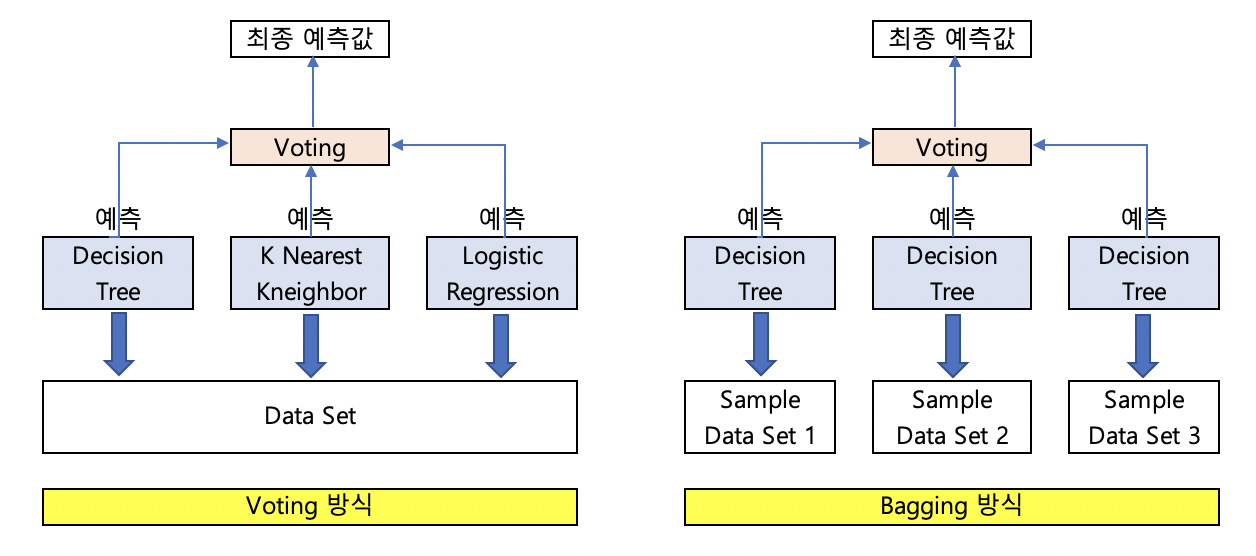
    

- 
    - 부스팅은 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(Weight)를 부여하면서 학습과 예측을 진행
        - 계속해서 분류기에게 가중치를 부스팅하면서 학습을 진행
    - Stacking = 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법

#### Voting 유형 - Hard Voting & Soft Voting
- 하드 보팅을 이용한 분류(Classification)는 다수결 원칙과 비슷
    - 예측한 결괏값들중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것
- 소프트 보팅은 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최조 보팅 결괏값으로 선정
    - 일반적으로 소프트 보팅이 보팅 방법으로 적용
- 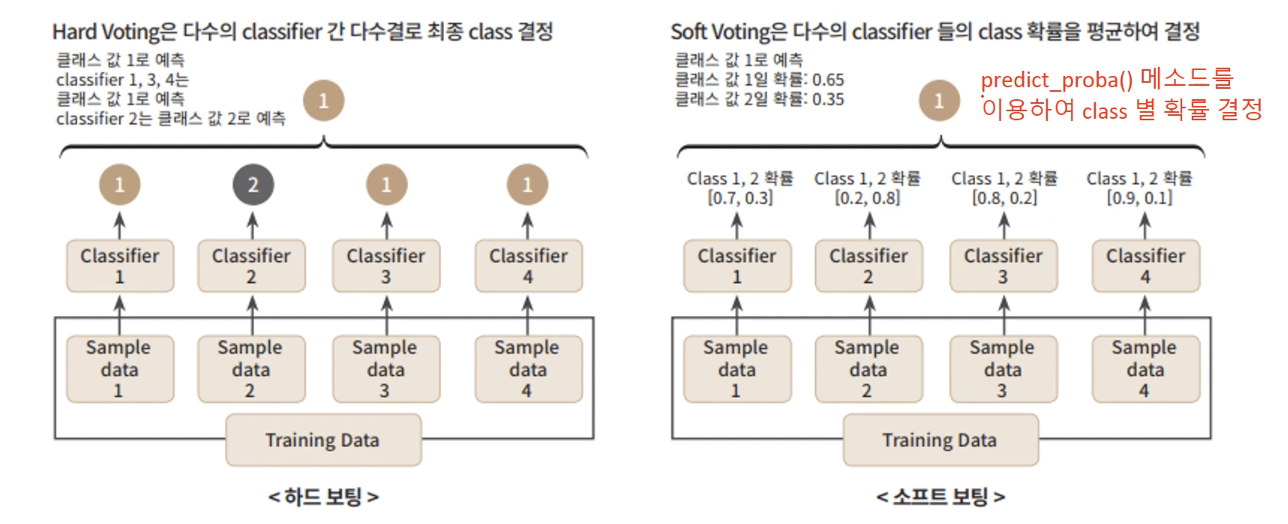

In [21]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [22]:
# 개별 모델은 로지스틱 호귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators =[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')

X_train, X_test,y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도 0.9386
KNeighborsClassifier 정확도 0.9386


#### 랜덤포레스트
- bagging = 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘
    - Bagging의 대표적인 알고리즘 = 랜덤포레스트
    - 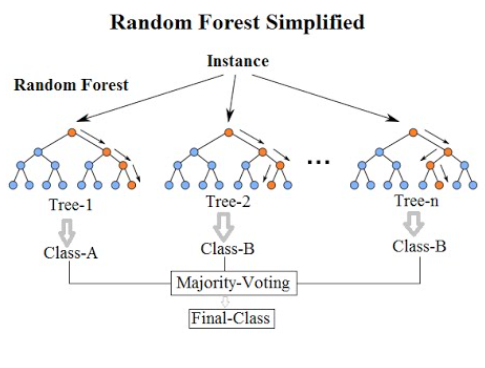
    - 랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트
        - 여러 개의 데이터 세트를 중첩되게 분리하는 것 => Bootstrapping 분할 방식
            - Boostrapping => 통계학에서 여러 개의 작은 데이터 세트를 임의로 만들어 개발 평균의 분포도를 측정하는 등의 목적을 위한 샘플링 방식을 지칭
        - 랜덤 포레스트의 subset 데이터는 이러한 부트스트래핑으로 데이터가 임의로 만들어짐
        

- 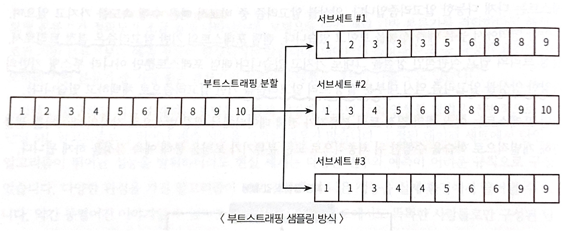

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_humnan_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


#### 랜덤 포레스트 하이퍼 파라미터 및 튜닝
- n_estimators: 랜덤 포레스트에서 결정 트리의 개수를 지정합니다. 디폴트는 10개입니다. 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아닙니다. 또한 늘릴수록 학습 수행 시간이 오래 걸리는 것도 감안
- max_features는 결정 트리에 사용된 max_features 파라미터와 같습니다. 하지만 RandomForestClassifier의 기본 max_features는 'None'이 아니라 'auto', 즉, 'sqrt'와 같습니다. 따라서, 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt(전체 피처 개수)만큼 참조
- max_depth나 min_samples_leaf와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있습니다.

In [24]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf': [8,12,18],
    'min_samples_split': [8,16,20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print("최적 하이퍼 파리미터:\n",grid_cv.best_params_)
print("최고 예측 정확도: {0:.4f}".format(grid_cv.best_score_))

최적 하이퍼 파리미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [25]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8,
                                min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


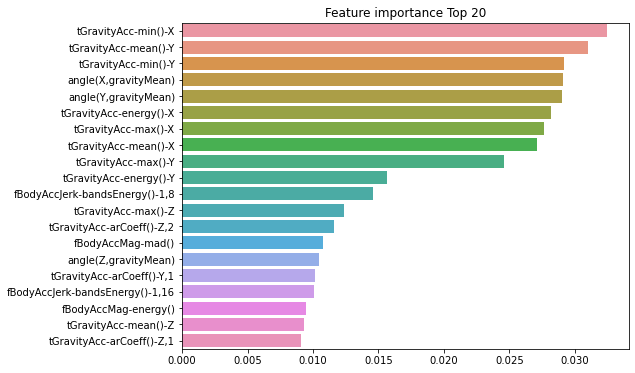

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title("Feature importance Top 20")
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

#### GBM(Gradient Boosting Machine)
- 부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하면서 방식
    - 부스팅의 대표적인 구현 = AdaBoost(Adaptive boosting)와 그래디언트 부스트
         - AdaBoost = 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
    - 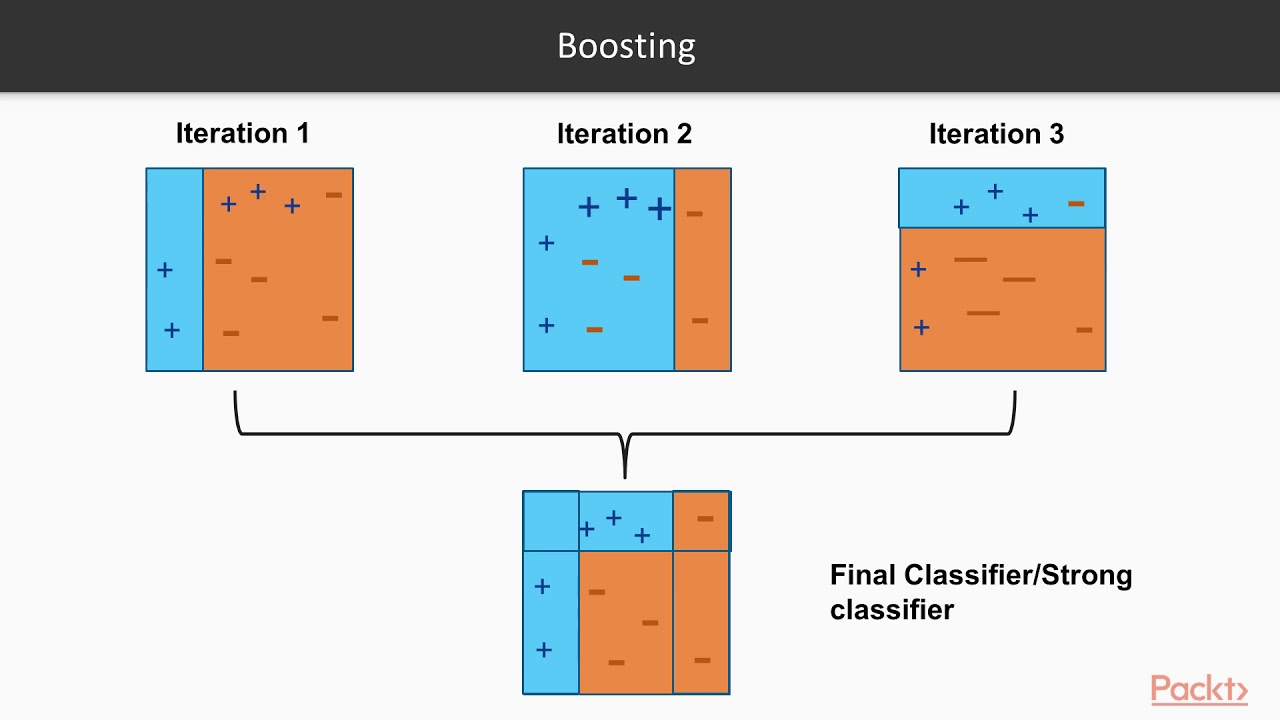
- GBM =  가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것
    - 오류값 = 실제값 - 예측값
    - 분류의 실제 결괏값을 y, 피처를 x1, x2, ... xn, 그리고 이 피처에 기반한 예측함수를 F(x) 함수라고 하면 오류식 h(x) = y - F(x)이 됩니다.
        - 이 오류식 h(x) = y - F(x)를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것이 경사 하강법(Gradient Descent)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print("GBM 정확도: {0:.4f}".format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초".format(time.time() - start_time))

- GBM 하이퍼 파라미터 및 튜닝
    - loss: 경사 하강법에서 사용할 비용 함수를 지정합니다. 특별한 이유가 없으면 기본값인 'deviance'를 그대로 적용합니다.
    - learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률입니다. Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수입니다. 0~1 사이의 값을 지정할 수 있으며 기본값은 0.1입니다. 너무 작은 값을 적용하면 업데이트 되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높습니다. 하지만 많은 weak learner는 순차적인 반복이 필요해서 수행 시간이 오래 걸리고, 또 너무 작게 설정하면 모든 weak learner의 반복이 완료돼도 최소 오류 값을 찾지 못할 수 있습니다. 반대로 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높아지지만, 빠른 수행이 가능합니다.
        - 이러한 특성 때문에 learning_rate는 n_estimators와 상호 보완적으로 조합해 사용합니다. learning_rate를 작게 하고 n_estimators를 크게 하면 더 이상 성능이 좋아지지 않는 한계점까지 예측 성능이 조금씩 좋아질 수 있습니다. 하지만 수행 시간이 너무 오래 걸리는 단점이 있으며, 예측 성능 역시 현격히 좋아지지는 않습니다.
    - n_estimators: weak learner의 개수입니다. weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있습니다. 하지만 개수가 많을수록 수행 시간이 오래 걸립니다. 기본값은 100입니다.
    - subsamples: weak learner가 학습에 사용하는 데이터의 샘플링 비율입니다. 기본값은 1이며, 이는 전체 학습 데이터 기반으로 학습한다는 의미(0.5이면 학습 데이터의 50%). 과적합이 염려되는 경우 subsamples을 1보다 작은 값으로 설정

In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators': [100, 500],
#     'learning_rate': [0.05, 0.1]
# }
# grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
# grid_cv.fit(X_train, y_train)
# print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
# print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# # GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
# gb_pred = grid_cv.best_estimator_.predict(X_test)
# gb_accuracy = accuracy_score(y_test, gb_pred)
# print("GBM 정확도: {0:.4f}".format(gb_accuracy))

#### XGBoost(eXtra Graident Boost)

- XGBoost는 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘
- XGBoost는 GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제를 해결함
- 장점
    - 뛰어난 예측 성능
        - 일반적으로 분류와 회귀 영역에서 뛰어난 예측 성능을 발휘합니다
    - GBM 대비 빠른 수행 시간
        - 일반적인 GBM은 순차적으로 Weak Learner가 가중치를 증감하는 방법으로 학습하기 때문에 전반적으로 속도가 느립니다. 하지만 XGBoost는 병렬 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능을 보장합니다. 아쉽게도 XGBoost가 일반적인 GBM에 비해 수행시간이 빠르다는 것이지, 다른 머신러닝 알고리즘(예를 들어 랜덤 포레스트)에 비해서 빠르다는 의미는 아닙니다.
    - 과적합 규제(Regularization)
        - 표준 GBM의 경우 과적합 규제 기능이 없으나 XGBoost는 자체에 과적합 규제 기능으로 과적합에 좀 더 강한 내구성을 가질 수 있습니다.
    - Tree Pruning(나무 가지치기)
        - 일반적으로 GBM은 분할 시 부정 손실이 발생하면 분할을 더 이상 수행하지 않지만, 이러한 방식도 자칫 지나치게 많은 분할을 발생할 수 있습니다.
        - 다른 GBM과 마찬가지로 XGBoost도 max_depth 파라미터로 분할 깊이를 조정하기도 하지만, tree pruning으로 더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 더 줄이는 추가적인 장점을 가지고 있습니다.
    - 자체 내장된 교차 검증
        - XGBoost는 반복 수행 시마다 내부적으로 학습 데이터 세트와 평가 데이터 세트에 대한 교차 검증을 수행해 최적화된 반복 수행 횟수를 가질 수 있습니다.
        - 지정된 반복 횟수가 아니라 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화 되면 반복을 중간에 멈출 수 있는 조기 중단 기능이 있습니다.
    - 결손값 자체 처리
        - XGBoost는 결손값을 자체 처리할 수 있는 기능을 가지고 있습니다.
- 

In [1]:
import xgboost as xgb
from xgboost import XGBClassifier

- XGBoost 하이퍼 파라미터 유형
    - 일반 파라미터: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없습니다.
    - 부스터 파라미터: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭합니다.
    - 학습 태스트 파라미터: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터입니다.
- 주요 일반 파라미터
    - booster: gbtree(tree based model) 또는 gblinear (linear model) 선택. 디폴트는 gbtree입니다.
    - silent: 디폴트는 0이며, 출력 메시지를 나타내고 싶지 않을 경우 1로 설정합니다.
    - nthread: CPU의 실행 스레드 개수를 조정하며, 디폴트는 CPU의 전체 스레드를 다 사용하는 것입니다. 멀티 코어/스레드 CPU 시스템에서 전체 CPU를 사용하지 않고 일부 CPU만 사용해 ML 애플리케이션을 구동하는 경우에 변경합니다.
- 주요 부스트 파라미터
    - eta (default = 0.3, alias: learning_rate) : GBM의 학습률(learning rate)과 같은 파라미터입니다. 0에서 1 사이의 값을 지정하며 부스팅 스템을 반복적으로 수행할 때 업데이트되는 학습률 값. 파이썬 래퍼 기반의 xgboost를 이용할 경우 디폴트는 0.3. 사이킷런 래퍼 클래스를 이용할 경우 eta는 learning_rate 파라미터로 대체되며, 디폴트는 0.1입니다. 보통은 0.01 ~ 0.2 사이의 값을 선호합니다.
    - num_boost_rounds : GBM의 n_estimators와 같은 파라미터입니다.
    - min_child_weight(default=1): GBM의 min_child_leaf와 유사함(똑같지는 않음). 과적합을 조절하기 위해 사용됩니다.
    - gamma (default=0, alias: min_split_loss): 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값입니다. 해당 값보다 큰 손실(loss)이 감소된 경우에 리프 노드를 분리합니다. 값이 클수록 과적합 감소 효과가 있습니다.
    - max_depth (default=6): 트리 기반 알고리즘의 max_depth와 같습니다. 0을 지정하면 깊이에 제한이 없습니다. max_depth가 높으면 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통은 3~10 사이의 값을 적용합니다.
    - sub_sample (default=1): GBM의 subsample과 동일합니다. 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정합니다. sub_sample = 0.5로 지정하면 전체 데이터의 절반을 트리를 생성하는 데 사용합니다. 0 에서 1 사이의 값이 가능하나 일반적으로 0.5 ~ 1 사이의 값을 사용합니다.
    - colsample_bytree (default=1): GBM의 max_features와 유사합니다. 트리 생성에 필요한 피처(칼럼)를 임의로 샘플링하는 데 사용됩니다. 매우 많은 피처가 있는 경우 과적합을 조정하는 데 적용합니다.
    - lambda (default=1, alias=reg_lambda): L2 Regularization 적용 값입니다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있습니다.
    - alpha (default=0, alias=reg_alpha): L1 Regularization 적용 값입니다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있습니다.
    - scale_pos_weight (default=1): 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터입니다.
- 학습 태스크 파라미터
    - objective: 최솟값을 가져야할 손실 함수를 정의합니다. XGBoost는 많은 유형의 손실함수를 사용할 수 있습니다. 주로 사용되는 손실함수는 이진 분류인지 다중 분류인지에 따라 달라집니다.
    - binary:logistic: 이진분류일 때 적용합니다.
    - multi:softmax: 다중 분류일 때 적용합니다. 손실함수가 multi:softmax일 경우네는 레이블 클래스의 개수인 num_class 파라미터를 지정해야 합니다.
    - multi:softprob: multi:softmax와 유사하나 개별 레이블 클래스의 해당되는 예측 확률을 반환합니다.
    - eval_metric: 검증에 사용되는 함수를 정의합니다. 기본값은 회귀인 경우는 rmse, 분류일 경우에는 error입니다. 다음은 eval_metric의 값 유형입니다.
        - rmse: Root Mean Square Error
        - mae: Mean Absolute Error
        - logloss: Negative log-likelihood
        - error: Binary classification error rate (0.5 threshold)
        - merror: Multiclass classification error rate
        - mlogloss: Multiclass logloss
        - auc : Area under the curve
- 과적합 문제가 심각하다면 다음과 같이 적용
    - eta 값을 낮춥니다 (0.01 ~ 0.1). eta 값을 낮출 경우 num_round (또는 n_estimator)는 반대로 높여줘야 합니다.
    - max_detph 값을 낮춥니다.
    - min_child_weight 값을 높입니다.
    - gamma 값을 높입니다.
    - 또한 subsample와 colsample_bytree를 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움이 될 수 있습니다.

In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [4]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [5]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                   test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [6]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [8]:
params = {
    'max_depth':3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'early_stoppings':100
}
num_rounds = 400

In [9]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기합니다.
wlist = [(dtrain, 'train'), (dtest, 'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[10:21:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0

[162]	train-logloss:0.00724	eval-logloss:0.08776
[163]	train-logloss:0.00722	eval-logloss:0.08778
[164]	train-logloss:0.00720	eval-logloss:0.08778
[165]	train-logloss:0.00718	eval-logloss:0.08752
[166]	train-logloss:0.00716	eval-logloss:0.08754
[167]	train-logloss:0.00714	eval-logloss:0.08764
[168]	train-logloss:0.00712	eval-logloss:0.08739
[169]	train-logloss:0.00710	eval-logloss:0.08738
[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08696
[177]	train-logloss:0.00696	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:0.00688	eval-logloss:0.08680
[182]	train-logloss:

[330]	train-logloss:0.00533	eval-logloss:0.08587
[331]	train-logloss:0.00532	eval-logloss:0.08589
[332]	train-logloss:0.00532	eval-logloss:0.08592
[333]	train-logloss:0.00531	eval-logloss:0.08584
[334]	train-logloss:0.00531	eval-logloss:0.08574
[335]	train-logloss:0.00530	eval-logloss:0.08582
[336]	train-logloss:0.00529	eval-logloss:0.08589
[337]	train-logloss:0.00529	eval-logloss:0.08594
[338]	train-logloss:0.00528	eval-logloss:0.08583
[339]	train-logloss:0.00528	eval-logloss:0.08591
[340]	train-logloss:0.00527	eval-logloss:0.08583
[341]	train-logloss:0.00526	eval-logloss:0.08573
[342]	train-logloss:0.00526	eval-logloss:0.08568
[343]	train-logloss:0.00525	eval-logloss:0.08572
[344]	train-logloss:0.00525	eval-logloss:0.08580
[345]	train-logloss:0.00524	eval-logloss:0.08582
[346]	train-logloss:0.00524	eval-logloss:0.08571
[347]	train-logloss:0.00523	eval-logloss:0.08579
[348]	train-logloss:0.00523	eval-logloss:0.08583
[349]	train-logloss:0.00522	eval-logloss:0.08573
[350]	train-logloss:

In [10]:
pred_probs = xgb_model.predict(dtest)
print('Predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print("예측값 10개만 표시:", preds[:10])

Predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.95  0.003 0.9   0.086 0.993 1.    1.    0.999 0.998 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC 값: {4:.4f}'.format(accuracy, precision, recall, f1, roc_score))

In [19]:
get_clf_eval(y_test, preds)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC 값: 0.9665


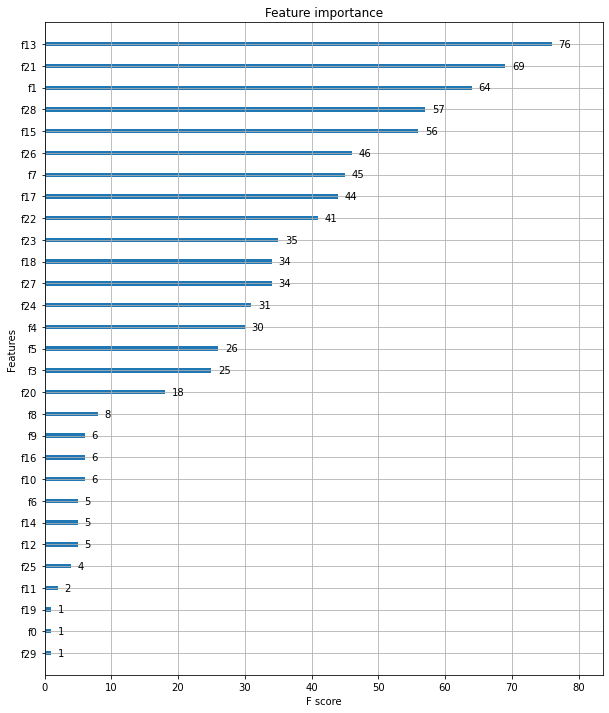

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [21]:
# 사이킷런 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)

In [22]:
get_clf_eval(y_test, w_preds)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC 값: 0.9665


In [24]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_detph=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',
               eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)

[10:36:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_detph } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.61337
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.54858
[2]	validation_0-logloss:0.49512
[3]	validation_0-logloss:0.44986
[4]	validation_0-logloss:0.41116
[5]	validation_0-logloss:0.37614
[6]	validation_0-logloss:0.34804
[7]	validation_0-logloss:0.32294
[8]	validation_0-logloss:0.30000
[9]	validation_0-logloss:0.28071
[10]	validation_0-logloss:0.26271
[11]	validation_0-logloss:0.24796
[12]	validation_0-logloss:0.23401
[13]	validation_0-logloss:0.22258
[14]	validation_0-logloss:0.21137
[15]	validation_0-logloss:0.20297
[16]	valid

[225]	validation_0-logloss:0.11051
[226]	validation_0-logloss:0.11049
[227]	validation_0-logloss:0.11043
[228]	validation_0-logloss:0.11048
[229]	validation_0-logloss:0.11051
[230]	validation_0-logloss:0.11058
[231]	validation_0-logloss:0.11046
[232]	validation_0-logloss:0.11043
[233]	validation_0-logloss:0.11041
[234]	validation_0-logloss:0.11036
[235]	validation_0-logloss:0.11018
[236]	validation_0-logloss:0.11022
[237]	validation_0-logloss:0.11010
[238]	validation_0-logloss:0.11007
[239]	validation_0-logloss:0.11003
[240]	validation_0-logloss:0.11007
[241]	validation_0-logloss:0.11011
[242]	validation_0-logloss:0.11000
[243]	validation_0-logloss:0.10999
[244]	validation_0-logloss:0.11019
[245]	validation_0-logloss:0.11026
[246]	validation_0-logloss:0.11015
[247]	validation_0-logloss:0.11035
[248]	validation_0-logloss:0.11031
[249]	validation_0-logloss:0.11014
[250]	validation_0-logloss:0.11017
[251]	validation_0-logloss:0.10999
[252]	validation_0-logloss:0.10998
[253]	validation_0-l

In [25]:
get_clf_eval(y_test, ws100_preds)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744, AUC 값: 0.9530


In [26]:
# early_stopping_rounds를 10으로 설정하고 제 학습
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10,
               eval_metric='logloss', eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
get_clf_eval(y_test, ws10_preds)

[10:37:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_detph } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.61337
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.54858
[2]	validation_0-logloss:0.49512
[3]	validation_0-logloss:0.44986
[4]	validation_0-logloss:0.41116
[5]	validation_0-logloss:0.37614
[6]	validation_0-logloss:0.34804
[7]	validation_0-logloss:0.32294
[8]	validation_0-logloss:0.30000
[9]	validation_0-logloss:0.28071
[10]	validation_0-logloss:0.26271
[11]	validation_0-logloss:0.24796
[12]	validation_0-logloss:0.23401
[13]	validation_0-logloss:0.22258
[14]	validation_0-logloss:0.21137
[15]	validation_0-logloss:0.20297
[16]	valida

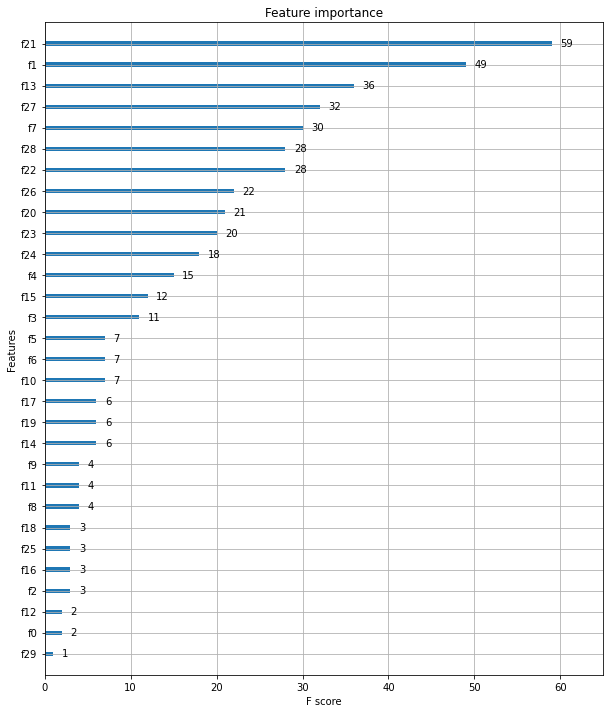

In [27]:
fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 Wrapper 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)